In [2]:
import pandas as pd
data_folder = "/content/sample_data/Images"
from glob import glob
all_files = glob(data_folder+"/*")


all_images = sorted([img for img in all_files if img.endswith((".png",".jpg", ".jpeg", ".JPG"))])

print("Total {} images ".format(len(all_images)))

Total 228 images 


In [3]:
from pathlib import Path

def get_index_of_digit(string):
    import re
    match = re.search("\d", Path(string).stem)
    return match.start(0)

id_path = [(Path(image).stem[:(get_index_of_digit(Path(image).stem))], image) for image in all_images]

label_file = "/content/BMI, age, gender data.csv"
image_df = pd.DataFrame(id_path, columns=['UID', 'path'])
profile_df = pd.read_csv(label_file)
profile_df

data_df = image_df.merge(profile_df)
data_df

,UID,path,id,name,Unnamed: 3,Age,Gender,height,weight,BMI
0,akshay,/content/sample_data/Images/akshay1.jpeg,1,akshay kumar,NaN,54,1,1.78,80,25.249337
1,akshay,/content/sample_data/Images/akshay10.jpg,1,akshay kumar,NaN,54,1,1.78,80,25.249337
2,akshay,/content/sample_data/Images/akshay11.jpg,1,akshay kumar,NaN,54,1,1.78,80,25.249337
3,akshay,/content/sample_data/Images/akshay12.jpg,1,akshay kumar,NaN,54,1,1.78,80,25.249337
4,akshay,/content/sample_data/Images/akshay13.jpg,1,akshay kumar,NaN,54,1,1.78,80,25.249337
...,...,...,...,...,...,...,...,...,...,...
223,vikky,/content/sample_data/Images/vikky5.jpg,8,vicky kaushal,NaN,34,1,1.83,80,23.888441
224,vikky,/content/sample_data/Images/vikky6.jpg,8,vicky kaushal,NaN,34,1,1.83,80,23.888441
225,vikky,/content/sample_data/Images/vikky7.jpg,8,vicky kaushal,NaN,34,1,1.83,80,23.888441
226,vikky,/content/sample_data/Images/vikky8.jpg,8,vicky kaushal,NaN,34,1,1.83,80,23.888441


<ipython-input-4-d89a52e9d42b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

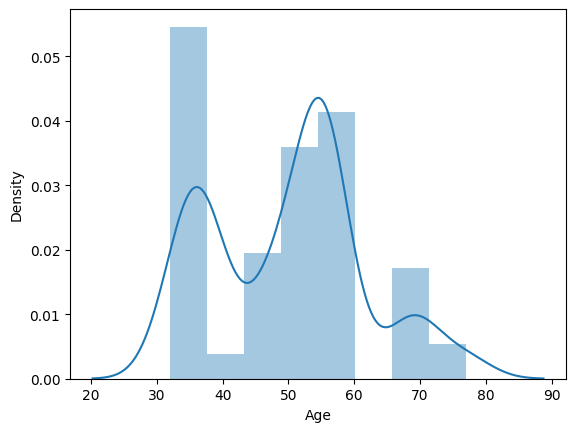

In [4]:
import seaborn as sns
sns.distplot(data_df['Age'])

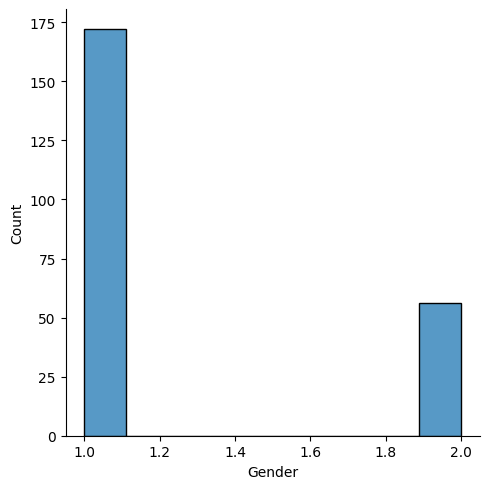

In [6]:
sns.displot(data_df['Gender'])
# 1 = male
# 2 = Female

In [7]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=f64befdabdbc19694a7742c2646a683d6508e666f3df1ef2dc5e38e8b0099b74
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [8]:
import face_recognition
import numpy as np
def get_face_encoding(image_path):
    print(image_path)
    picture_of_me = face_recognition.load_image_file(image_path)
    my_face_encoding = face_recognition.face_encodings(picture_of_me)
    if not my_face_encoding:
        print("no face found !!!")
        return np.zeros(128).tolist()
    return my_face_encoding[0].tolist()
all_faces = []
for images in data_df.path:
    face_enc = get_face_encoding(images)
    all_faces.append(face_enc)

/content/sample_data/Images/akshay1.jpeg
/content/sample_data/Images/akshay10.jpg
/content/sample_data/Images/akshay11.jpg
/content/sample_data/Images/akshay12.jpg
/content/sample_data/Images/akshay13.jpg
/content/sample_data/Images/akshay14.jpg
/content/sample_data/Images/akshay15.jpg
/content/sample_data/Images/akshay16.jpg
/content/sample_data/Images/akshay17.jpg
/content/sample_data/Images/akshay18.jpg
/content/sample_data/Images/akshay19.jpg
/content/sample_data/Images/akshay2.jpeg
no face found !!!
/content/sample_data/Images/akshay20.jpg
/content/sample_data/Images/akshay3.jpg
/content/sample_data/Images/akshay4.jpg
/content/sample_data/Images/akshay5.jpg
/content/sample_data/Images/akshay6.jpg
/content/sample_data/Images/akshay7.jpg
/content/sample_data/Images/akshay8.jpg
/content/sample_data/Images/akshay9.jpg
/content/sample_data/Images/amir1.jpg
/content/sample_data/Images/amir10.jpg
/content/sample_data/Images/amir11.jpg
/content/sample_data/Images/amir12.jpg
/content/sampl

In [9]:
X = np.array(all_faces)

In [10]:
y_age = data_df.Age.values ## all labels
y_gender = data_df.Gender.values
y_height = data_df.height.values ## all labels
y_weight = data_df.weight.values
y_BMI = data_df.BMI.values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test, y_height_train, y_height_test, y_weight_train, y_weight_test ,y_BMI_train, y_BMI_test = train_test_split(X, y_age,y_gender,y_height,y_weight,y_BMI, random_state=1)

In [12]:
def report_goodness(model,X_test,y_test,predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test
    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))

    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [13]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_age = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)

model_age = model_age.fit(X_train,np.log(y_age_train))

report_goodness(model_age,X_test,y_age_test)

Mean squared error: 0.01
Variance score: 0.89
Model Performance
Average Error: 0.0653 degrees.
Accuracy = 98.29%.


In [14]:
model_gender = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)

model_gender = model_gender.fit(X_train,np.log(y_gender_train))

report_goodness(model_gender,X_test,y_gender_test)

Mean squared error: 0.00
Variance score: 0.96
Model Performance
Average Error: 0.0409 degrees.
Accuracy = -inf%.


<ipython-input-12-e55047cb1737>:14: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(errors / y_true)


In [15]:
model_height = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)

model_height = model_height.fit(X_train,np.log(y_height_train))

report_goodness(model_height,X_test,y_height_test)

Mean squared error: 0.00
Variance score: 0.76
Model Performance
Average Error: 0.0153 degrees.
Accuracy = 97.18%.


In [16]:
model_weight = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)

model_weight = model_weight.fit(X_train,np.log(y_weight_train))

report_goodness(model_weight,X_test,y_weight_test)

Mean squared error: 0.00
Variance score: 0.88
Model Performance
Average Error: 0.0394 degrees.
Accuracy = 99.08%.


In [17]:
model_BMI = KernelRidge(kernel='rbf', gamma=0.21,alpha=0.0017)
model_BMI = model_BMI.fit(X_train,np.log(y_BMI_train))

report_goodness(model_BMI,X_test,y_BMI_test)

Mean squared error: 0.00
Variance score: 0.85
Model Performance
Average Error: 0.0344 degrees.
Accuracy = 98.91%.


In [18]:
!pip install joblib
import joblib
age_model = 'age_predictor'
gender_model = 'gender_predictor'
joblib.dump(model_age, age_model)
joblib.dump(model_gender, gender_model)
height_model = 'weight_predictor.model'
weight_model = 'height_predictor.model'
bmi_model = 'bmi_predictor.model'
joblib.dump(model_height, height_model)
joblib.dump(model_weight, weight_model)
joblib.dump(model_BMI, bmi_model)

['bmi_predictor.model']

In [19]:
age_model = joblib.load(age_model)
gender_model = joblib.load(gender_model)
height_model = joblib.load(height_model)
weight_model = joblib.load(weight_model)
bmi_model = joblib.load(bmi_model)

In [25]:
def predict_age_gender(test_image, age_model, gender_model, height_model, weight_model, bmi_model):
    test_array = np.expand_dims(np.array(get_face_encoding(test_image)), axis=0)
    age = float(np.exp(age_model.predict(test_array))[0])
    gender = float(np.exp(gender_model.predict(test_array))[0])
    height = float(np.exp(height_model.predict(test_array))[0])
    weight = float(np.exp(weight_model.predict(test_array))[0])
    bmi = float(np.exp(bmi_model.predict(test_array))[0])
    return {'Age': age, 'Gender': gender, 'height': height, 'weight': weight, 'bmi': bmi}


In [26]:
from IPython.display import Image

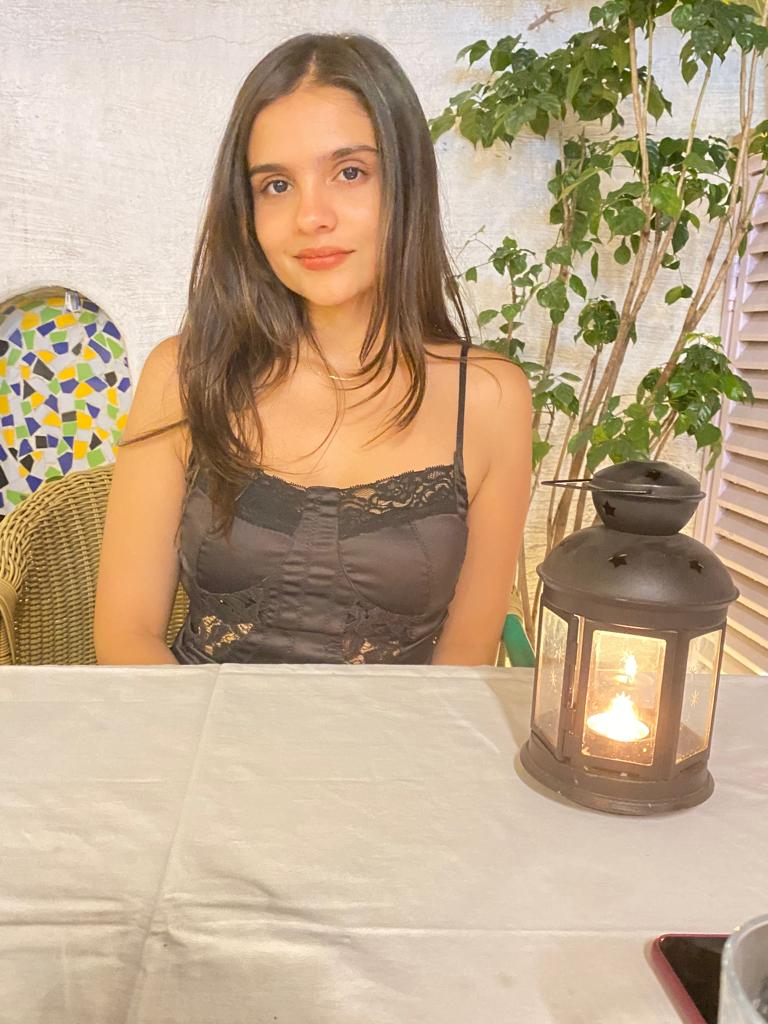

In [27]:
test_image = '/content/WhatsApp Image 2023-05-25 at 7.01.00 PM.jpeg'
Image(test_image)

In [28]:
predict_age_gender(test_image,age_model,gender_model,height_model,weight_model,bmi_model)

/content/WhatsApp Image 2023-05-25 at 7.01.00 PM.jpeg


{'Age': 33.81895112078984,
 'Gender': 1.9454553947073534,
 'height': 1.6889137335743203,
 'weight': 60.49530273800276,
 'bmi': 21.208342095076695}